In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from photonics.fields import *

In [5]:
schema.spawn_missing_classes()

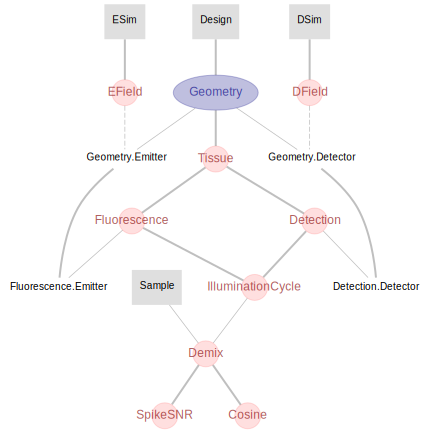

In [6]:
dj.Diagram(schema)

In [ ]:
keys = DField.fetch('KEY')
fig, ax = plt.subplots(1, len(keys), figsize=(6*len(keys), 6))
for a, key in zip(ax.flatten(), keys):
    (DField & key).plot(axis=a, title=(DSim & key).fetch1('dsim_description'))
fig.savefig('detector-fields.png')

In [7]:
Tissue.delete()

About to delete:
`photonics`.`__detection__detector`: 288 items
`photonics`.`__cosine`: 17 items
`photonics`.`__spike_s_n_r`: 17 items
`photonics`.`__demix`: 17 items
`photonics`.`__illumination_cycle`: 3 items
`photonics`.`__detection`: 3 items
`photonics`.`__fluorescence__emitter`: 16596 items
`photonics`.`__fluorescence`: 3 items
`photonics`.`__tissue`: 3 items
Proceed? [yes, No]: yes
Committed.


In [ ]:
EField.populate(reserve_jobs=True)

In [ ]:
keys = EField.fetch('KEY', order_by="KEY")
fig, ax = plt.subplots(1, len(keys), figsize=(6*len(keys), 6))
for a, key in zip(ax.flatten(), keys):
    (EField & key).plot(axis=a, title=(ESim & key).fetch1('esim_description'))
fig.savefig('emitter-fields.png')

In [ ]:
EField.fetc

In [ ]:
!open emitter-fields.pdf

In [ ]:
(EField & 'esim=10').plot()

In [ ]:
a = np.r_[0:2*np.pi:np.pi/24]
cs = np.cos(a)
sn = np.sin(a)
sn = np.sin(np.arcsin(sn)/2)
plt.scatter(np.sign(cs)*np.sqrt(1-sn*sn), sn, s=4)
plt.axis('equal')
plt.axis(False);

In [ ]:

@schema
class ESim(dj.Lookup):
    definition = """
    # Emission Field Specification
    esim : int
    --- 
    esim_description : varchar(1024) 
    beam_compression : float  
    y_steer : float   # the steer angle in the plane of the shank
    emitter_width=10.00: decimal(5,2)   # (um) along x-axis
    emitter_height=10.00:  decimal(5,2)  # (um) along y-axis
    anisotropy = 0.88 : float  # factor in the Henyey-Greenstein formula
    absorption_length = 14000 : float # (um)  average travel path before a absoprtion event    
    scatter_length=100 : float # (um) average travel path before a scatter event
    volume_dimx = 1000 : int unsigned # (voxels)
    volume_dimy = 1000 : int unsigned # (voxels)
    volume_dimz = 1000 : int unsigned # (voxels)
    beam_xy_aspect = 1.0 : float   # compression of y. E.g. 2.0 means that y is compressed by factor of 2
    pitch = 2.2 : float  # (um)  spatial sampling period of the model volume
    """

    contents = [
        dict(esim=0, esim_description="Lambertian 10 x 10",
             beam_compression=1.0, y_steer=0.0),

        dict(esim=10, esim_description="Narrowed to pi/4, steered -24/64*pi",
             beam_compression=1/4, y_steer=-24/64*np.pi),
        dict(esim=11, esim_description="Narrowed to \pi/4, steered -18/64*pi",
             beam_compression=1/4, y_steer=-18/64*np.pi),
        dict(esim=12, esim_description="Narrowed to \pi/4, steered -12/64*pi",
             beam_compression=1/4, y_steer=-12/64*np.pi),
        dict(esim=13, esim_description="Narrowed to \pi/4, steered -6/64*pi",
             beam_compression=1/4, y_steer= -6/64*np.pi),
        dict(esim=14, esim_description="Narrowed to \pi/4, steered 0",
             beam_compression=1/4, y_steer= 0*np.pi),
        dict(esim=15, esim_description="Narrowed to \pi/4, steered +6/64*pi",
             beam_compression=1/4, y_steer=+6/64*np.pi),
        dict(esim=16, esim_description="Narrowed to \pi/4, steered +12/64*pi",
             beam_compression=1/4, y_steer=+12/64*np.pi),
        dict(esim=17, esim_description="Narrowed to \pi/4, steered +18/64*pi",
             beam_compression=1/4, y_steer=+18/64*np.pi),
        dict(esim=18, esim_description="Narrowed to \pi/4, steered +24/64*pi",
             beam_compression=1/3, y_steer=+24/64*np.pi),

        dict(esim=20, esim_description="Narrowed to pi/3, steered -pi/3",
             beam_compression=1/3, y_steer=-np.pi/3),
        dict(esim=21, esim_description="Narrowed to \pi/3, steered -pi/4",
             beam_compression=1/3, y_steer=-np.pi/4),
        dict(esim=22, esim_description="Narrowed to \pi/3, steered -pi/6",
             beam_compression=1/3, y_steer=-np.pi/6),
        dict(esim=23, esim_description="Narrowed to \pi/3, steered -pi/12",
             beam_compression=1/3, y_steer=-np.pi/12),
        dict(esim=24, esim_description="Narrowed to \pi/3, steered 0",
             beam_compression=1/3, y_steer=0),
        dict(esim=25, esim_description="Narrowed to \pi/3, steered +pi/12",
             beam_compression=1/3, y_steer=+np.pi/12),
        dict(esim=26, esim_description="Narrowed to \pi/3, steered +pi/6",
             beam_compression=1/3, y_steer=+np.pi/6),
        dict(esim=27, esim_description="Narrowed to \pi/3, steered +pi/4",
             beam_compression=1/3, y_steer=+np.pi/4),
        dict(esim=28, esim_description="Narrowed to \pi/3, steered +pi/3",
             beam_compression=1/3, y_steer=+np.pi/3),

        dict(esim=30, esim_description="Narrowed to pi/3, steered -pi/3",
             beam_compression=1/3, y_steer=-np.pi/3),
        dict(esim=31, esim_description="Narrowed to \pi/3, steered -pi/4",
             beam_compression=1/3, y_steer=-np.pi/4),
        dict(esim=32, esim_description="Narrowed to \pi/3, steered -pi/6",
             beam_compression=1/3, y_steer=-np.pi/6),
        dict(esim=33, esim_description="Narrowed to \pi/3, steered -pi/12",
             beam_compression=1/3, y_steer=-np.pi/12),
        dict(esim=34, esim_description="Narrowed to \pi/3, steered 0",
             beam_compression=1/3, y_steer=0),
        dict(esim=35, esim_description="Narrowed to \pi/3, steered +pi/12",
             beam_compression=1/3, y_steer=+np.pi/12),
        dict(esim=36, esim_description="Narrowed to \pi/3, steered +pi/6",
             beam_compression=1/3, y_steer=+np.pi/6),
        dict(esim=37, esim_description="Narrowed to \pi/3, steered +pi/4",
             beam_compression=1/3, y_steer=+np.pi/4),
        dict(esim=38, esim_description="Narrowed to \pi/3, steered +pi/3",
             beam_compression=1/3, y_steer=+np.pi/3),
    ]

In [ ]:
ESim.alter()

In [ ]:
ESim.describe()

In [ ]:
DField()

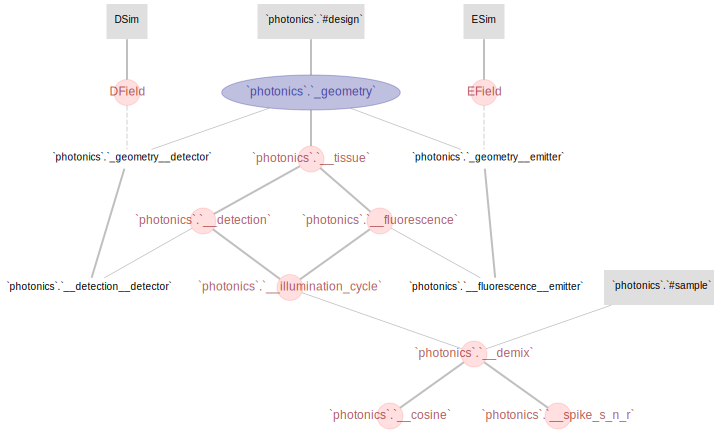

In [3]:
dj.ERD(schema)

In [ ]:
(DSim() & 'detector_height=10').delete()